Social Network Analysis - Part 2 - Example 6
(Network Measures - Directed Network)

In this exercise, we will use networkx package to compute network-level measures:

Size
Density
Diameter
Average Path Length
Reachability
Reciprocity

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Generate a random graph (Erdos Renyi Graph)
# Ref: https://www.geeksforgeeks.org/erdos-renyl-model-generating-random-graphs/

num_nodes = 5
prob = 0.4 # probability of edge creation between a pair of nodes
G = nx.erdos_renyi_graph(num_nodes, prob, directed=True)

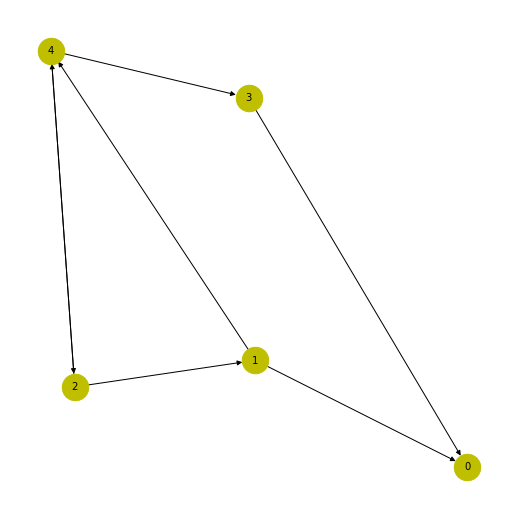

In [3]:
# Draw the network
plt.figure(figsize = (7, 7))
nx.draw(G, with_labels=True, node_size=700, node_color='y', font_size=10)
plt.show()

In [4]:
# Size
# It is equivalent to the total number of nodes in the network
print("Size: ", G.number_of_nodes())

Size:  5


In [5]:
# Density
# Ref: https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.classes.function.density.html
print("Density: ", nx.density(G))

Density:  0.35


In [8]:
# Diameter
# Ref: https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.shortest_paths.generic.has_path.html
# Ref: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html

# We will attempt to find the shortest path between any pair of nodes in the network
# And find the LARGEST shortest path --> Diameter

shortest_path_list = []
node_list = list(G.nodes)

for source in node_list:
    for target in node_list:
        # nx.has_path(G, source, target) : Returns True if G has a path from source to target
        if source != target and nx.has_path(G, source, target):
            print("======= Source: ", source, " & Target: ", target, "========")
            shortest_path = nx.shortest_path(G, source=source, target=target)
            print("Shortest path: ",shortest_path)
            shortest_path_list.append(len(shortest_path))
            
# Now that we have a list of shortest distances
# Let's find the max value
# This is the network's "diameter")
print("\nDiameter: ", max(shortest_path_list) - 1)

======= Source:  1  & Target:  0 ========
Shortest path:  [1, 0]
======= Source:  1  & Target:  2 ========
Shortest path:  [1, 4, 2]
======= Source:  1  & Target:  3 ========
Shortest path:  [1, 4, 3]
======= Source:  1  & Target:  4 ========
Shortest path:  [1, 4]
======= Source:  2  & Target:  0 ========
Shortest path:  [2, 1, 0]
======= Source:  2  & Target:  1 ========
Shortest path:  [2, 1]
======= Source:  2  & Target:  3 ========
Shortest path:  [2, 4, 3]
======= Source:  2  & Target:  4 ========
Shortest path:  [2, 4]
======= Source:  3  & Target:  0 ========
Shortest path:  [3, 0]
======= Source:  4  & Target:  0 ========
Shortest path:  [4, 3, 0]
======= Source:  4  & Target:  1 ========
Shortest path:  [4, 2, 1]
======= Source:  4  & Target:  2 ========
Shortest path:  [4, 2]
======= Source:  4  & Target:  3 ========
Shortest path:  [4, 3]

Diameter:  2


In [9]:
# Average Path Length
# Ref: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html
print("Average path length: ", nx.average_shortest_path_length(G))

Average path length:  0.95


In [12]:
# Reachability
# Ref: https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.dag.descendants.html

num_max_reachable_other_nodes = G.number_of_nodes() - 1

print("Total number of reachable other nodes: ", num_max_reachable_other_nodes)
node_list = list(G.nodes)  # All nodes - we will iterate through this list, one node at a time

node_reachability_list = []
for node in node_list:
    # Retrieve 'descendants' or all reachable other nodes
    # nx.descendants returns a Set
    desc = nx.descendants(G, node)
    
    # How many other nodes are reachable from this node?
    num_reachable_from_this_node = len(desc)
    node_reachability = num_reachable_from_this_node / num_max_reachable_other_nodes
    print("==========================================")
    print("Current node is", node, " and node-level reachability is", node_reachability)
    print(desc)
    node_reachability_list.append(node_reachability)
    
print("\n################ Network-level Reachability ################")
print( sum(node_reachability_list) / len(node_reachability_list) )

Total number of reachable other nodes:  4
Current node is 0  and node-level reachability is 0.0
set()
Current node is 1  and node-level reachability is 1.0
{0, 2, 3, 4}
Current node is 2  and node-level reachability is 1.0
{0, 1, 3, 4}
Current node is 3  and node-level reachability is 0.25
{0}
Current node is 4  and node-level reachability is 1.0
{0, 1, 2, 3}

################ Network-level Reachability ################
0.65


In [13]:
# Reciprocity
# Ref: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.reciprocity.reciprocity.html#networkx.algorithms.reciprocity.reciprocity
# There ARE several different reciprocity calculation methods.
# This function seems to be using a different calculation approach... than our approach
print("Reciprocity: ", nx.reciprocity(G))

Reciprocity:  0.2857142857142857


In [15]:
# Reciprocity (method used in Week 6 lecture slides)
'''
Suppose that a network has the following edges:

0 -> 3
1 <-> 2
2 -> 4
3 -> 1

Of the 4 edges, how many are "reciprocating"?
Looks like... there is only one.
It is:
         1 <-> 2
         
Thus, the network reciprocity is:

     1 / 4 = 0.25 (25%)
     
'''

# Retrieve all edges
# Each edge is a tuple
edge_list = list(G.edges())
print(edge_list)



# Not the most efficient code - feel free to re-write!

total_num_edges = 0
all_edges = []
reciprocating_edges = []

for (source, target) in edge_list:
    if (str(source) + "<->" + str(target)) not in reciprocating_edges:
        total_num_edges += 1
        all_edges.append(str(source) + "-" + str(target))
        
        # Returns True if the edge (target, source) is in the graph.
        if G.has_edge(target, source):
            print("=========== Nodes ", source, "and", target, " have a bi-directional/reciprocal edge =========")
            reciprocating_edges.append( str(target) + "<->" + str(source) )

# Let's see the statistics
print("\nTotal number of edges: ", total_num_edges)
print(all_edges)
print("\nTotal number of 'reciprocating' edges: ", len(reciprocating_edges))
print(reciprocating_edges)

network_reciprocity = len(reciprocating_edges) / len(all_edges)
print("\nNetwork-level Reciprocity: %.3f" % network_reciprocity)

[(1, 0), (1, 4), (2, 1), (2, 4), (3, 0), (4, 2), (4, 3)]
=========== Nodes  2 and 4  have a bi-directional/reciprocal edge =========

Total number of edges:  6
['1-0', '1-4', '2-1', '2-4', '3-0', '4-3']

Total number of 'reciprocating' edges:  1
['4<->2']

Network-level Reciprocity: 0.167
